# JWST Filter Response Curves
To make the lensing galaxy appear bluer/redder in our simulations of strong gravitational lenses, we use the package speclite: https://speclite.readthedocs.io/en/latest/.

Speclite has many applications and we'll use its *kcorrect* function to kcorrect the apparent magnitude of the lensing galaxy given its stellar mass. The Euclid filter response curves are provided by Speclite, however, JWST filter reponse curves are not supported, so, we'll have to define them here.

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
import astropy
import speclite as sl
import astropy.units as u
from speclite import filters

We'll list the filters supported by Speclite noting that JWST filters are not supported.

In [2]:
all_filters = sl.filters.filter_group_names
print(all_filters)

['sdss2010', 'decam2014', 'wise2010', 'hsc2017', 'lsst2016', 'bessell', 'BASS', 'MzLS', 'Euclid', 'decamDR1', 'decamDR1noatm', 'gaiadr2']


So, we'll create a new filter group *NIRcam* with specified band names for each filter. The data for each filter and its response is taken from: http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php?id=JWST/NIRCam.F444W.

In [3]:

NIRcam_F115W = sl.filters.FilterResponse(
    wavelength=[9975.60, 11494.31, 11623.88, 12652.00, 13058.40] * u.Angstrom,
    response = [0, 0.30, 0.32, 0.39, 0], meta=dict(group_name='NIRcam', band_name='F115W'))

NIRcam_F150W = sl.filters.FilterResponse(
    wavelength = [13041.19, 15007.44, 15010.69, 16547.90, 16948.89] * u.Angstrom,
    response =[0, 0.42, 0.425, 0.46, 0], meta=dict(group_name='NIRcam', band_name='F150W'))

NIRcam_F200W = sl.filters.FilterResponse(
    wavelength = [17249.08, 19886.48, 19920.76, 22044.00, 22596.64] * u.Angstrom,
    response = [0, 0.45, 0.457, 0.475, 0], meta=dict(group_name='NIRcam', band_name='F200W'))

NIRcam_F277W = sl.filters.FilterResponse(
    wavelength = [23673.12, 27617.40, 27762.83, 28991.30, 32203.22] * u.Angstrom,
    response = [0, 0.40, 0.405, 0.41, 0], meta=dict(group_name='NIRcam', band_name='F277W'))

NIRcam_F356W = sl.filters.FilterResponse(
    wavelength=[30732.91, 35652.16, 35683.62, 38604.70, 40801.26] * u.Angstrom,
    response = [0, 0.45, 0.455, 0.5, 0], meta=dict(group_name='NIRcam', band_name='F356W'))

NIRcam_F444W = sl.filters.FilterResponse(
    wavelength = [38039.57, 43523.20, 44043.15, 44405.49, 50995.50] * u.Angstrom,
    response = [0, 0.5, 0.47, 0.45, 0], meta=dict(group_name='NIRcam', band_name='F444W'))

Note that the listed responses must be in ascending order.

We can now load these filters using *NIRcam-*.

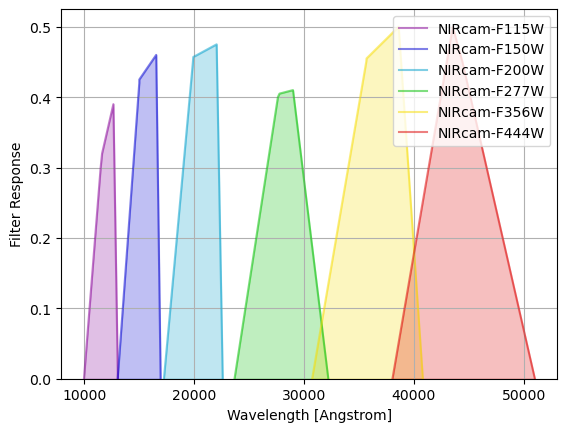

In [4]:
NIRcam = sl.filters.load_filters('NIRcam-F115W', 'NIRcam-F150W', 'NIRcam-F200W', 'NIRcam-F277W', 'NIRcam-F356W', 'NIRcam-F444W')
sl.filters.plot_filters(NIRcam) 

To use these filters in our simulations, we can save the filters to any directory. Note that for speclite to recognise a custom filter, it must be saved with an *.ecsv* extension.

In [5]:
# save to YOUR directory
dir_name = '/Users/ruby/Documents/Python Scripts/cGAN/Euclid-JWST/FilterInformation/'
f115w_name = NIRcam_F115W.save(dir_name)
f150w_name = NIRcam_F150W.save(dir_name)
f200w_name = NIRcam_F200W.save(dir_name)
f277w_name = NIRcam_F277W.save(dir_name)
f356w_name = NIRcam_F356W.save(dir_name)
f444w_name = NIRcam_F444W.save(dir_name)

These should now be saved with an *.ecsv* extension. We can load these filters with speclite.
Euclid filters are already supported by Speclite.

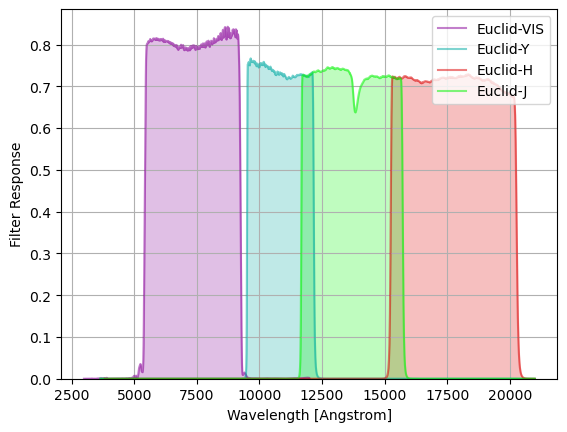

In [6]:
# load Euclid filters
euclid = sl.filters.load_filters('Euclid-VIS', 'Euclid-Y', 'Euclid-H', 'Euclid-J')
sl.filters.plot_filters(euclid)